# Part 2: Stochastic Gradient Descent, Momentum, and Adam

### For this part of the lab, using the same data and setup as in Part 1, compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will perform. You are free to write all of the code on your own, or if you prefer, you can fill in the missing sections in the code below.

### Start by reusing some of the functions you have coded for Part 1 to compute the hypothesis, the gradient of the cost function, and the cost function. This code will then be used by the next section of the workbook.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## generate M data points roughly forming a line (noise added)
M = 50
theta_true = torch.Tensor([[0.5], [2]]) #2*1

X = 10 * torch.rand(M, 2) - 5  #50*2
X[:, 1] = 1.0

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1) #50*1

## hypothesis computes $h_theta$
'''
p=2,n=50
theta:p*1
X:n*p
h_theta:n*1
'''
def hypothesis(theta, X):
    # YOUR CODE HERE
    h_theta = torch.mm(X,theta)
    return h_theta

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
'''
theta:p*1
X:n*p
y:n*1
grad:p*1
'''
def grad_cost_func(theta, X, y): 
    # YOUR CODE HERE
    n, p = X.shape
    grad = 0.5 * (2/n) * X.t() @ (hypothesis(theta, X)-y)
    return grad
    
## cost_func computes
'''
theta:p*1 or p*m
X:n*p
y:n*1
J:1*1 or 1*m
'''
def cost_func(theta, X, y):
    # YOUR CODE HERE
    n,p = X.shape
    J= 0.5/n  * ((hypothesis(theta, X)-y)**2).sum(0)
    return J

## Now we'd like to compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will run over weight updates. Complete the defined functions below and make sure to add the parameters which may need to be passed into the functions as well. Plot the weight updates over the contour plot using varying colours. Note, for clarity, you may only want to plot some of the updates.

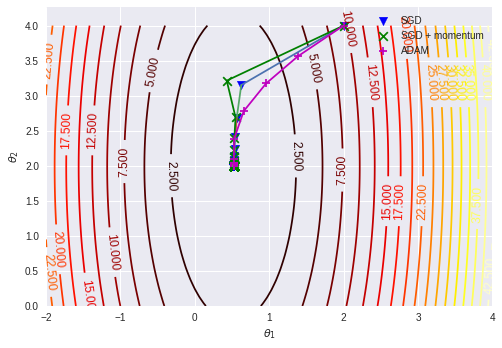

In [ ]:
import random
## The weight update computed using the ADAM optimisation algorithm
def weightupdate_adam(count, X, y):
    # YOUR CODE HERE
    theta=theta_adam_hist[:,:,count-1]
    v=torch.zeros(p,1)
    s=torch.zeros(p,1)
    e=10**(-8)
    for idx in data:
        xi=X[idx:idx+1]
        yi=y[idx:idx+1]
        grad=grad_cost_func(theta,xi,yi)
        v=beta_1*v+(1-beta_1)*grad
        s=beta_2*s+(1-beta_2)*(grad**2)
        v_corr=v/(1-beta_1**count)
        s_corr=s/(1-beta_2**count)
        theta=theta-alpha*v_corr/(torch.sqrt(s_corr)+e)
    return theta

## The weight update computed using SGD + momentum
def weightupdate_sgd_momentum(count, X, y,v):
    # YOUR CODE HERE
    theta=theta_mom_hist[:,:,count-1]
    for idx in data:
        xi=X[idx:idx+1]
        yi=y[idx:idx+1]
        grad=grad_cost_func(theta,xi,yi)
        v=beta_1*v+(1-beta_1)*grad
        theta=theta-alpha*v
    return theta,v

## The weight updated computed using SGD
def weightupdate_sgd(count, X, y):
    # YOUR CODE HERE
    theta=theta_sgd_hist[:,:,count-1]
    for idx in data:
        xi=X[idx:idx+1]
        yi=y[idx:idx+1]
        grad=grad_cost_func(theta,xi,yi)
        theta=theta-alpha*grad
    return theta
    
N = 200
beta_1 = 0.9
beta_2 = 0.999
alpha = 0.01

theta_0 = torch.Tensor([[2],[4]]) #initialise

# Write the code that will call of the optimisation update functions and compute weight updates for each individual data point over N iterations.

# YOUR CODE HERE
data=[]
n,p=X.shape
for i in range(n):
    data.append(i)
random.shuffle(data)

# SGD
theta_sgd_hist=torch.empty(p,1,N+1)  #2*1*200
theta_sgd_hist[:,:,0]=theta_0
for count in range(1,N+1):
    theta_sgd=weightupdate_sgd(count, X, y)
    theta_sgd_hist[:,:,count]=theta_sgd
    
# SGD + momentum
theta_mom_hist=torch.empty(p,1,N+1) 
theta_mom_hist[:,:,0]=theta_0
v=torch.zeros(p,1)
for count in range(1,N+1):
    theta_mom,v=weightupdate_sgd_momentum(count, X, y,v)
    theta_mom_hist[:,:,count]=theta_mom
    
# Adam
theta_adam_hist=torch.empty(p,1,N+1) 
theta_adam_hist[:,:,0]=theta_0
for count in range(1,N+1):
    theta_adam=weightupdate_adam(count, X, y)
    theta_adam_hist[:,:,count]=theta_adam

theta_0_vals = np.linspace(-2,4,100)
theta_1_vals = np.linspace(0,4,100)
theta = torch.Tensor(len(theta_0_vals),2)

# Compute the value of the cost function, J, over all the thetas in order to plot the contour below.
# YOUR CODE HERE
xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
J = torch.Tensor(theta.shape[0],theta.shape[0])  #100*100
xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)  #100*100
for(i,j), v in np.ndenumerate(J):
    if(j<100):
       theta[j,:]=torch.Tensor([[xc[i,j],yc[i,j]]])  #1*2
       if(j==99):
          J[i,:]=torch.Tensor(cost_func(theta.t(), X, y)) #2*100,100*2,100*1 J:100
         
contours = plt.contour(xc, yc, J, 20,cmap=plt.cm.hot)
plt.clabel(contours)

# Now plot the output of SGD, momentum and Adam all on the same plot for comparison
# YOUR CODE HERE
colors = ['b', 'g', 'm', 'c', 'orange']
markers=['v','x','+']
labels=['SGD','SGD + momentum','ADAM']

# SGD
plt.scatter(theta_sgd_hist.numpy()[0,:,:],theta_sgd_hist.numpy()[1,:,:],c=colors[0],marker=markers[0],label=labels[0], s=75) #the 1st row, the 2nd row
for i in range(theta_sgd_hist.shape[2]):
    if i<theta_sgd_hist.shape[2]-1:
       point1=[theta_sgd_hist.numpy()[0,0,i],theta_sgd_hist.numpy()[0,0,i+1]]
       point2=[theta_sgd_hist.numpy()[1,0,i],theta_sgd_hist.numpy()[1,0,i+1]]
       plt.plot(point1,point2)

# SGD + momentum        
plt.scatter(theta_mom_hist.numpy()[0,:,:],theta_mom_hist.numpy()[1,:,:],c=colors[1],marker=markers[1],label=labels[1], s=75) 
x2_points=[]
y2_points=[]
for i in range(theta_mom_hist.shape[2]):
     x2_points.append(theta_mom_hist.numpy()[0,0,i])
     y2_points.append(theta_mom_hist.numpy()[1,0,i])
plt.plot(x2_points,y2_points,colors[1])

# Adam
plt.scatter(theta_adam_hist.numpy()[0,:,:],theta_adam_hist.numpy()[1,:,:],c=colors[2],marker=markers[2],label=labels[2], s=75)
x3_points=[]
y3_points=[]
for i in range(theta_adam_hist.shape[2]):
     x3_points.append(theta_adam_hist.numpy()[0,0,i])
     y3_points.append(theta_adam_hist.numpy()[1,0,i])
plt.plot(x3_points,y3_points,colors[2])

plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.legend()
plt.show()
